# Time Series Data Exercise

1. Load Zillow zip-level house pricing per square foot data from http://files.zillowstatic.com/research/public/Zip/Zip_MedianValuePerSqft_AllHomes.csv 


2. Find the five zip codes with the largest dollar decrease in price-per-sq-foot from their absolute maximum value to a subsequent minimum. (The most recent value can be treated as a minimum for this question)
   - Build a time series plot of price for those 5 zip codes.
   - Summarize in a few sentences why you think those zip codes are on the top of this list. (Googling the zip codes may help.)


3. Build a Machine Learning model to predict the price-per-sq-foot of homes in April 2019 using the "CountyName" and the previous 6 months of pricing data. (ie. 2018/10 -- 2019/03 inclusive). Please split your train/test datasets as 85/15.
   - What metric would you use to measure the model results? Why this metric? Apply it to your model. How good do you think the model is? 
   - If we built a model that incorporated all of Metro, City, and CountyName columns together alongside 6 months of time series data, do you think it would be significantly more accurate or not?  Explain your reasoning in few sentences. 

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from scipy import stats

1. Load Zillow zip-level house pricing per square foot data from http://files.zillowstatic.com/research/public/Zip/Zip_MedianValuePerSqft_AllHomes.csv

In [2]:
df = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv', encoding = "ISO-8859-1")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,200.0,200.0,201.0,201.0,200.0,200.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,206.0,207.0,207.0,208.0,210.0,212.0,214.0,217.0,221.0,225.0,229.0,233.0,237.0,241.0,245.0,248.0,252.0,256.0,259.0,263.0,...,1301,1312,1318,1319,1320,1321,1318,1309,1306,1311,1321,1322,1319,1316,1315,1315,1320,1324,1325,1330,1339,1338,1331,1331,1332,1332,1338,1347,1347,1340,1334,1329,1323,1315,1301,1285,1282,1279,1264,1248
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,156.0,157.0,157.0,158.0,158.0,158.0,159.0,159.0,160.0,160.0,161.0,161.0,162.0,162.0,163.0,163.0,165.0,166.0,167.0,169.0,171.0,174.0,176.0,178.0,181.0,183.0,186.0,189.0,192.0,195.0,198.0,200.0,203.0,...,455,456,457,458,458,458,458,458,461,464,466,466,467,468,468,468,469,468,468,468,469,471,472,473,475,476,475,474,475,475,475,476,476,477,478,479,481,485,490,491
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,359.0,359.0,359.0,359.0,360.0,360.0,361.0,361.0,363.0,364.0,366.0,368.0,370.0,373.0,376.0,379.0,382.0,387.0,392.0,397.0,403.0,408.0,414.0,420.0,425.0,431.0,436.0,440.0,444.0,448.0,452.0,455.0,459.0,...,1691,1705,1707,1707,1708,1713,1719,1727,1735,1746,1752,1759,1767,1772,1767,1750,1736,1727,1713,1703,1702,1696,1680,1663,1648,1641,1648,1658,1652,1633,1614,1601,1591,1581,1568,1550,1533,1511,1487,1471
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,67.0,68.0,68.0,67.0,67.0,67.0,66.0,65.0,65.0,64.0,64.0,63.0,63.0,63.0,64.0,65.0,66.0,67.0,69.0,71.0,74.0,76.0,77.0,77.0,78.0,78.0,78.0,78.0,78.0,79.0,81.0,83.0,85.0,...,111,111,111,112,112,111,111,111,112,111,111,111,110,110,110,110,110,110,110,110,110,111,111,111,111,112,112,112,112,113,113,113,113,114,114,114,114,114,114,114
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,199.0,200.0,201.0,201.0,201.0,201.0,201.0,200.0,200.0,200.0,199.0,198.0,198.0,197.0,197.0,196.0,196.0,197.0,198.0,200.0,202.0,205.0,208.0,211.0,214.0,217.0,221.0,224.0,228.0,231.0,235.0,238.0,241.0,...,485,486,487,490,492,492,492,494,497,500,503,503,503,504,505,506,508,510,510,510,511,513,514,516,519,520,520,521,522,523,524,524,523,525,526,527,529,532,532,529


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14790 entries, 0 to 14789
Columns: 285 entries, RegionID to 2019-05
dtypes: float64(231), int64(50), object(4)
memory usage: 32.2+ MB


In [4]:
#Check for missing values
print(df.isnull().sum())

RegionID         0
RegionName       0
City             0
State            0
Metro         1127
              ... 
2019-01          0
2019-02          0
2019-03          0
2019-04          0
2019-05          0
Length: 285, dtype: int64


<i>df.interpolate('time') can't be used unless index is datetime - so, remember to fill in NA values later. Not necessary at the moment for solving Problem 2.</i>

In [5]:
#Rename 'RegionName' to 'Zip Code' for convenience
df.columns = df.columns.str.replace('RegionName', 'ZIP Code')
df.head()

,RegionID,ZIP Code,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,200.0,200.0,201.0,201.0,200.0,200.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,206.0,207.0,207.0,208.0,210.0,212.0,214.0,217.0,221.0,225.0,229.0,233.0,237.0,241.0,245.0,248.0,252.0,256.0,259.0,263.0,...,1301,1312,1318,1319,1320,1321,1318,1309,1306,1311,1321,1322,1319,1316,1315,1315,1320,1324,1325,1330,1339,1338,1331,1331,1332,1332,1338,1347,1347,1340,1334,1329,1323,1315,1301,1285,1282,1279,1264,1248
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,156.0,157.0,157.0,158.0,158.0,158.0,159.0,159.0,160.0,160.0,161.0,161.0,162.0,162.0,163.0,163.0,165.0,166.0,167.0,169.0,171.0,174.0,176.0,178.0,181.0,183.0,186.0,189.0,192.0,195.0,198.0,200.0,203.0,...,455,456,457,458,458,458,458,458,461,464,466,466,467,468,468,468,469,468,468,468,469,471,472,473,475,476,475,474,475,475,475,476,476,477,478,479,481,485,490,491
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,359.0,359.0,359.0,359.0,360.0,360.0,361.0,361.0,363.0,364.0,366.0,368.0,370.0,373.0,376.0,379.0,382.0,387.0,392.0,397.0,403.0,408.0,414.0,420.0,425.0,431.0,436.0,440.0,444.0,448.0,452.0,455.0,459.0,...,1691,1705,1707,1707,1708,1713,1719,1727,1735,1746,1752,1759,1767,1772,1767,1750,1736,1727,1713,1703,1702,1696,1680,1663,1648,1641,1648,1658,1652,1633,1614,1601,1591,1581,1568,1550,1533,1511,1487,1471
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,67.0,68.0,68.0,67.0,67.0,67.0,66.0,65.0,65.0,64.0,64.0,63.0,63.0,63.0,64.0,65.0,66.0,67.0,69.0,71.0,74.0,76.0,77.0,77.0,78.0,78.0,78.0,78.0,78.0,79.0,81.0,83.0,85.0,...,111,111,111,112,112,111,111,111,112,111,111,111,110,110,110,110,110,110,110,110,110,111,111,111,111,112,112,112,112,113,113,113,113,114,114,114,114,114,114,114
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,199.0,200.0,201.0,201.0,201.0,201.0,201.0,200.0,200.0,200.0,199.0,198.0,198.0,197.0,197.0,196.0,196.0,197.0,198.0,200.0,202.0,205.0,208.0,211.0,214.0,217.0,221.0,224.0,228.0,231.0,235.0,238.0,241.0,...,485,486,487,490,492,492,492,494,497,500,503,503,503,504,505,506,508,510,510,510,511,513,514,516,519,520,520,521,522,523,524,524,523,525,526,527,529,532,532,529


2. Find the five zip codes with the largest dollar decrease in price-per-sq-foot from their absolute maximum value to a subsequent minimum. (The most recent value can be treated as a minimum for this question)

In [6]:
#Reshape the df
df_trim = df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
df_trim = df_trim.set_index('ZIP Code')
df_trim.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,...,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
ZIP Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,200.0,200.0,201.0,201.0,200.0,200.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,206.0,207.0,207.0,208.0,210.0,212.0,214.0,217.0,221.0,225.0,229.0,233.0,237.0,241.0,245.0,248.0,252.0,256.0,259.0,263.0,268.0,273.0,278.0,284.0,290.0,297.0,304.0,...,1301,1312,1318,1319,1320,1321,1318,1309,1306,1311,1321,1322,1319,1316,1315,1315,1320,1324,1325,1330,1339,1338,1331,1331,1332,1332,1338,1347,1347,1340,1334,1329,1323,1315,1301,1285,1282,1279,1264,1248
60657,156.0,157.0,157.0,158.0,158.0,158.0,159.0,159.0,160.0,160.0,161.0,161.0,162.0,162.0,163.0,163.0,165.0,166.0,167.0,169.0,171.0,174.0,176.0,178.0,181.0,183.0,186.0,189.0,192.0,195.0,198.0,200.0,203.0,207.0,210.0,213.0,216.0,219.0,222.0,225.0,...,455,456,457,458,458,458,458,458,461,464,466,466,467,468,468,468,469,468,468,468,469,471,472,473,475,476,475,474,475,475,475,476,476,477,478,479,481,485,490,491
10023,359.0,359.0,359.0,359.0,360.0,360.0,361.0,361.0,363.0,364.0,366.0,368.0,370.0,373.0,376.0,379.0,382.0,387.0,392.0,397.0,403.0,408.0,414.0,420.0,425.0,431.0,436.0,440.0,444.0,448.0,452.0,455.0,459.0,462.0,466.0,470.0,474.0,479.0,484.0,489.0,...,1691,1705,1707,1707,1708,1713,1719,1727,1735,1746,1752,1759,1767,1772,1767,1750,1736,1727,1713,1703,1702,1696,1680,1663,1648,1641,1648,1658,1652,1633,1614,1601,1591,1581,1568,1550,1533,1511,1487,1471
77494,67.0,68.0,68.0,67.0,67.0,67.0,66.0,65.0,65.0,64.0,64.0,63.0,63.0,63.0,64.0,65.0,66.0,67.0,69.0,71.0,74.0,76.0,77.0,77.0,78.0,78.0,78.0,78.0,78.0,79.0,81.0,83.0,85.0,87.0,88.0,89.0,91.0,92.0,93.0,94.0,...,111,111,111,112,112,111,111,111,112,111,111,111,110,110,110,110,110,110,110,110,110,111,111,111,111,112,112,112,112,113,113,113,113,114,114,114,114,114,114,114
60614,199.0,200.0,201.0,201.0,201.0,201.0,201.0,200.0,200.0,200.0,199.0,198.0,198.0,197.0,197.0,196.0,196.0,197.0,198.0,200.0,202.0,205.0,208.0,211.0,214.0,217.0,221.0,224.0,228.0,231.0,235.0,238.0,241.0,245.0,247.0,250.0,252.0,255.0,257.0,259.0,...,485,486,487,490,492,492,492,494,497,500,503,503,503,504,505,506,508,510,510,510,511,513,514,516,519,520,520,521,522,523,524,524,523,525,526,527,529,532,532,529


In [0]:
#Write a function that will find the desired value
def abs_max_to_next_min(row):
    
    abs_max = row['max']
    searching_for_min = False
    prev_val = 10000
    
    for val in row:
        if searching_for_min == True and val > prev_val: #prev_val is local min
            return abs_max - prev_val
        
        if searching_for_min == False and val == abs_max:
            searching_for_min = True
    
        prev_val = val
    
    return 0 #Last value is the max

In [8]:
df_trim['max'] = df_trim.apply(max, axis=1)
df_trim.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,...,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,max
ZIP Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,200.0,200.0,201.0,201.0,200.0,200.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,206.0,207.0,207.0,208.0,210.0,212.0,214.0,217.0,221.0,225.0,229.0,233.0,237.0,241.0,245.0,248.0,252.0,256.0,259.0,263.0,268.0,273.0,278.0,284.0,290.0,297.0,304.0,...,1312,1318,1319,1320,1321,1318,1309,1306,1311,1321,1322,1319,1316,1315,1315,1320,1324,1325,1330,1339,1338,1331,1331,1332,1332,1338,1347,1347,1340,1334,1329,1323,1315,1301,1285,1282,1279,1264,1248,1347.0
60657,156.0,157.0,157.0,158.0,158.0,158.0,159.0,159.0,160.0,160.0,161.0,161.0,162.0,162.0,163.0,163.0,165.0,166.0,167.0,169.0,171.0,174.0,176.0,178.0,181.0,183.0,186.0,189.0,192.0,195.0,198.0,200.0,203.0,207.0,210.0,213.0,216.0,219.0,222.0,225.0,...,456,457,458,458,458,458,458,461,464,466,466,467,468,468,468,469,468,468,468,469,471,472,473,475,476,475,474,475,475,475,476,476,477,478,479,481,485,490,491,491.0
10023,359.0,359.0,359.0,359.0,360.0,360.0,361.0,361.0,363.0,364.0,366.0,368.0,370.0,373.0,376.0,379.0,382.0,387.0,392.0,397.0,403.0,408.0,414.0,420.0,425.0,431.0,436.0,440.0,444.0,448.0,452.0,455.0,459.0,462.0,466.0,470.0,474.0,479.0,484.0,489.0,...,1705,1707,1707,1708,1713,1719,1727,1735,1746,1752,1759,1767,1772,1767,1750,1736,1727,1713,1703,1702,1696,1680,1663,1648,1641,1648,1658,1652,1633,1614,1601,1591,1581,1568,1550,1533,1511,1487,1471,1772.0
77494,67.0,68.0,68.0,67.0,67.0,67.0,66.0,65.0,65.0,64.0,64.0,63.0,63.0,63.0,64.0,65.0,66.0,67.0,69.0,71.0,74.0,76.0,77.0,77.0,78.0,78.0,78.0,78.0,78.0,79.0,81.0,83.0,85.0,87.0,88.0,89.0,91.0,92.0,93.0,94.0,...,111,111,112,112,111,111,111,112,111,111,111,110,110,110,110,110,110,110,110,110,111,111,111,111,112,112,112,112,113,113,113,113,114,114,114,114,114,114,114,114.0
60614,199.0,200.0,201.0,201.0,201.0,201.0,201.0,200.0,200.0,200.0,199.0,198.0,198.0,197.0,197.0,196.0,196.0,197.0,198.0,200.0,202.0,205.0,208.0,211.0,214.0,217.0,221.0,224.0,228.0,231.0,235.0,238.0,241.0,245.0,247.0,250.0,252.0,255.0,257.0,259.0,...,486,487,490,492,492,492,494,497,500,503,503,503,504,505,506,508,510,510,510,511,513,514,516,519,520,520,521,522,523,524,524,523,525,526,527,529,532,532,529,532.0


In [9]:
df_trim['diff'] = df_trim.apply(abs_max_to_next_min, axis=1)
df_trim.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,max,diff
ZIP Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,200.0,200.0,201.0,201.0,200.0,200.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,206.0,207.0,207.0,208.0,210.0,212.0,214.0,217.0,221.0,225.0,229.0,233.0,237.0,241.0,245.0,248.0,252.0,256.0,259.0,263.0,268.0,273.0,278.0,284.0,290.0,297.0,304.0,...,1318,1319,1320,1321,1318,1309,1306,1311,1321,1322,1319,1316,1315,1315,1320,1324,1325,1330,1339,1338,1331,1331,1332,1332,1338,1347,1347,1340,1334,1329,1323,1315,1301,1285,1282,1279,1264,1248,1347.0,99.0
60657,156.0,157.0,157.0,158.0,158.0,158.0,159.0,159.0,160.0,160.0,161.0,161.0,162.0,162.0,163.0,163.0,165.0,166.0,167.0,169.0,171.0,174.0,176.0,178.0,181.0,183.0,186.0,189.0,192.0,195.0,198.0,200.0,203.0,207.0,210.0,213.0,216.0,219.0,222.0,225.0,...,457,458,458,458,458,458,461,464,466,466,467,468,468,468,469,468,468,468,469,471,472,473,475,476,475,474,475,475,475,476,476,477,478,479,481,485,490,491,491.0,0.0
10023,359.0,359.0,359.0,359.0,360.0,360.0,361.0,361.0,363.0,364.0,366.0,368.0,370.0,373.0,376.0,379.0,382.0,387.0,392.0,397.0,403.0,408.0,414.0,420.0,425.0,431.0,436.0,440.0,444.0,448.0,452.0,455.0,459.0,462.0,466.0,470.0,474.0,479.0,484.0,489.0,...,1707,1707,1708,1713,1719,1727,1735,1746,1752,1759,1767,1772,1767,1750,1736,1727,1713,1703,1702,1696,1680,1663,1648,1641,1648,1658,1652,1633,1614,1601,1591,1581,1568,1550,1533,1511,1487,1471,1772.0,131.0
77494,67.0,68.0,68.0,67.0,67.0,67.0,66.0,65.0,65.0,64.0,64.0,63.0,63.0,63.0,64.0,65.0,66.0,67.0,69.0,71.0,74.0,76.0,77.0,77.0,78.0,78.0,78.0,78.0,78.0,79.0,81.0,83.0,85.0,87.0,88.0,89.0,91.0,92.0,93.0,94.0,...,111,112,112,111,111,111,112,111,111,111,110,110,110,110,110,110,110,110,110,111,111,111,111,112,112,112,112,113,113,113,113,114,114,114,114,114,114,114,114.0,0.0
60614,199.0,200.0,201.0,201.0,201.0,201.0,201.0,200.0,200.0,200.0,199.0,198.0,198.0,197.0,197.0,196.0,196.0,197.0,198.0,200.0,202.0,205.0,208.0,211.0,214.0,217.0,221.0,224.0,228.0,231.0,235.0,238.0,241.0,245.0,247.0,250.0,252.0,255.0,257.0,259.0,...,487,490,492,492,492,494,497,500,503,503,503,504,505,506,508,510,510,510,511,513,514,516,519,520,520,521,522,523,524,524,523,525,526,527,529,532,532,529,532.0,3.0


In [10]:
df_trim = df_trim.sort_values('diff', ascending=False)
df_top5 = df_trim.head()
df_top5
#Top 5 ZIP Codes: 34145, 96761, 33040, 93955, 33051

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,max,diff
ZIP Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34145,132.0,131.0,131.0,130.0,129.0,129.0,128.0,128.0,128.0,129.0,129.0,129.0,129.0,129.0,130.0,130.0,131.0,132.0,133.0,134.0,136.0,136.0,137.0,138.0,139.0,140.0,140.0,141.0,142.0,143.0,144.0,145.0,147.0,149.0,151.0,153.0,155.0,157.0,158.0,160.0,...,332,332,333,335,335,334,336,338,340,340,341,342,342,343,344,346,348,351,353,353,352,353,355,355,356,358,361,362,365,367,366,366,367,369,370,370,369,368,594.0,358.0
96761,209.0,208.0,207.0,207.0,207.0,207.0,208.0,209.0,211.0,213.0,214.0,216.0,217.0,217.0,217.0,217.0,216.0,215.0,214.0,213.0,212.0,212.0,211.0,211.0,211.0,211.0,211.0,211.0,211.0,211.0,211.0,211.0,211.0,212.0,213.0,214.0,216.0,219.0,223.0,227.0,...,632,636,636,640,644,646,648,652,656,658,655,648,641,637,634,637,648,661,669,676,676,680,690,698,697,695,697,703,701,700,703,712,711,705,711,724,727,726,855.0,345.0
33040,133.0,134.0,135.0,136.0,138.0,139.0,140.0,141.0,143.0,145.0,146.0,147.0,149.0,150.0,151.0,153.0,154.0,155.0,157.0,158.0,160.0,162.0,164.0,166.0,167.0,169.0,170.0,170.0,171.0,172.0,173.0,174.0,175.0,177.0,178.0,179.0,180.0,181.0,183.0,184.0,...,408,410,412,414,416,418,420,419,420,424,426,426,426,427,430,432,433,433,434,434,432,434,440,447,453,458,461,464,467,469,470,472,478,483,485,487,485,482,619.0,338.0
93955,120.0,120.0,119.0,119.0,118.0,118.0,118.0,118.0,119.0,119.0,120.0,120.0,120.0,120.0,121.0,121.0,122.0,123.0,124.0,125.0,126.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,134.0,136.0,137.0,138.0,139.0,141.0,143.0,145.0,147.0,149.0,152.0,154.0,...,355,359,365,369,371,375,378,380,381,382,386,389,391,394,396,396,396,397,399,401,405,408,411,414,416,419,425,429,432,434,439,443,446,447,447,447,448,447,567.0,325.0
33051,142.0,143.0,143.0,143.0,144.0,144.0,144.0,144.0,145.0,146.0,146.0,146.0,146.0,147.0,147.0,148.0,148.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,156.0,158.0,159.0,160.0,161.0,163.0,165.0,166.0,168.0,170.0,172.0,174.0,175.0,177.0,...,414,419,422,423,424,422,418,417,419,423,427,428,427,425,425,425,426,426,427,422,413,406,408,411,413,416,418,419,422,425,426,430,440,450,454,455,454,451,618.0,323.0


- Build a time series plot of price for those 5 zip codes.

In [11]:
#Reshape for plotting
df_top5 = df_top5.drop(['max', 'diff'], axis=1).T
df_top5.index = pd.to_datetime(df_top5.index)
df_top5.head()

ZIP Code,34145,96761,33040,93955,33051
1996-04-01,132.0,209.0,133.0,120.0,142.0
1996-05-01,131.0,208.0,134.0,120.0,143.0
1996-06-01,131.0,207.0,135.0,119.0,143.0
1996-07-01,130.0,207.0,136.0,119.0,143.0
1996-08-01,129.0,207.0,138.0,118.0,144.0


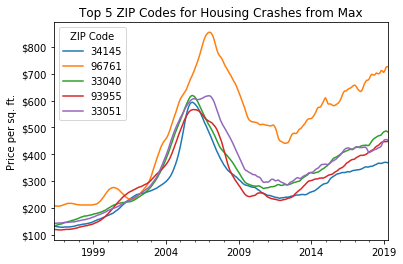

In [12]:
ax = df_top5.plot(title='Top 5 ZIP Codes for Housing Crashes from Max')

ax.set_ylabel('Price per sq. ft.')

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

- Summarize in a few sentences why you think those zip codes are on the top of this list. (Googling the zip codes may help.)

The housing markets of all of these ZIP Codes (from Florida, Hawaii, and California) were devastated by the subprime mortgage crisis of 2007-2009. These markets were booming in the years leading up to the housing crisis and thus were hit hardest by the ensuing panic and sell-offs. The most over-inflated assets deflate the most when a bubble bursts.

3. Build a Machine Learning model to predict the price-per-sq-foot of homes in April 2019 using the "CountyName" and the previous 6 months of pricing data. (ie. 2018/10 -- 2019/03 inclusive). Please split your train/test datasets as 85/15.

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [14]:
df_ml = df.loc[:,'2018-10':'2019-03'] #6 months prior pricing
df_ml['CountyName'] = df['CountyName'] #Add CountyName
df_ml.head()

,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,CountyName
0,1323,1315,1301,1285,1282,1279,New York County
1,476,477,478,479,481,485,Cook County
2,1591,1581,1568,1550,1533,1511,New York County
3,113,114,114,114,114,114,Harris County
4,523,525,526,527,529,532,Cook County


In [15]:
#Ensure no missing values
print(df_ml.isna().sum().sum())

0


In [16]:
#One Hot encode CountyName
df_ml = pd.get_dummies(df_ml, columns=['CountyName'])
df_ml.head()

,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,CountyName_Ada County,CountyName_Adair County,CountyName_Adams County,CountyName_Aiken County,CountyName_Aitkin County,CountyName_Alachua County,CountyName_Alamance County,CountyName_Alameda County,CountyName_Alamosa County,CountyName_Albany County,CountyName_Albemarle County,CountyName_Alexander County,CountyName_Allamakee County,CountyName_Allegan County,CountyName_Allegany County,CountyName_Alleghany County,CountyName_Allegheny County,CountyName_Allen County,CountyName_Amador County,CountyName_Amherst County,CountyName_Anchorage Borough,CountyName_Anderson County,CountyName_Andrew County,CountyName_Androscoggin County,CountyName_Angelina County,CountyName_Anne Arundel County,CountyName_Anoka County,CountyName_Anson County,CountyName_Apache County,CountyName_Aransas County,CountyName_Arapahoe County,CountyName_Archer County,CountyName_Archuleta County,CountyName_Arkansas County,...,CountyName_Whiteside County,CountyName_Whitfield County,CountyName_Whitley County,CountyName_Whitman County,CountyName_Wichita County,CountyName_Wicomico County,CountyName_Will County,CountyName_Williams County,CountyName_Williamson County,CountyName_Wilson County,CountyName_Windham County,CountyName_Winkler County,CountyName_Winnebago County,CountyName_Winneshiek County,CountyName_Winona County,CountyName_Winston County,CountyName_Wise County,CountyName_Wood County,CountyName_Woodbury County,CountyName_Woodford County,CountyName_Woodson County,CountyName_Woodward County,CountyName_Worcester County,CountyName_Wright County,CountyName_Wyandotte County,CountyName_Wyoming County,CountyName_Wythe County,CountyName_Yakima County,CountyName_Yalobusha County,CountyName_Yamhill County,CountyName_Yates County,CountyName_Yavapai County,CountyName_Yazoo County,CountyName_Yellowstone County,CountyName_Yoakum County,CountyName_Yolo County,CountyName_York County,CountyName_Young County,CountyName_Yuba County,CountyName_Yuma County
0,1323,1315,1301,1285,1282,1279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,476,477,478,479,481,485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1591,1581,1568,1550,1533,1511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,113,114,114,114,114,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,523,525,526,527,529,532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_ml['2019-04'] = df.loc[:,'2019-04'] #Add target variable to end of df

In [0]:
split = int(np.floor(0.85*len(df_ml))) #85/15 train/test split

trainX = np.array(df_ml.iloc[0:split,:-1])
trainY = np.array(df_ml.iloc[0:split,-1])

testX = np.array(df_ml.iloc[split:,:-1])
testY = np.array(df_ml.iloc[split:,-1])

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

trainX = scaler.fit_transform(trainX)
trainY = trainY.reshape(-1, 1)
trainY = scaler.fit_transform(trainY)

testX = scaler.fit_transform(testX)
testY = testY.reshape(-1, 1)
testY = scaler.fit_transform(testY)

In [39]:
# reshape input to [samples, time steps, features] for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(12571, 1, 1231) (12571, 1) (2219, 1, 1231) (2219, 1)


In [22]:
print(trainY)

[[0.66065748]
 [0.25026511]
 [0.77889714]
 ...
 [0.06203606]
 [0.04241782]
 [0.02704136]]


In [23]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 105s - loss: 2.3630e-04
Epoch 2/20
 - 104s - loss: 5.9410e-05
Epoch 3/20
 - 103s - loss: 4.0959e-05
Epoch 4/20
 - 103s - loss: 2.9748e-05
Epoch 5/20
 - 103s - loss: 2.2390e-05
Epoch 6/20
 - 103s - loss: 2.2494e-05
Epoch 7/20
 - 101s - loss: 1.8063e-05
Epoch 8/20
 - 100s - loss: 1.6534e-05
Epoch 9/20
 - 102s - loss: 1.5769e-05
Epoch 10/20
 - 101s - loss: 1.4849e-05
Epoch 11/20
 - 101s - loss: 1.3588e-05
Epoch 12/20
 - 103s - loss: 1.4300e-05
Epoch 13/20
 - 102s - loss: 1.1888e-05
Epoch 14/20
 - 103s - loss: 1.2060e-05
Epoch 15/20
 - 102s - loss: 1.0601e-05
Epoch 16/20
 - 101s - loss: 1.1316e-05
Epoch 17/20
 - 101s - loss: 1.0462e-05
Epoch 18/20
 - 100s - loss: 1.0876e-05
Epoch 19/20
 - 101s - loss: 1.0033e-05
Epoch 20/20
 - 101s - loss: 9.7661e-06


- What metric would you use to measure the model results? Why this metric? Apply it to your model. How good do you think the model is?

In [0]:
import math

In [40]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.87 RMSE
Test Score: 15.75 RMSE


Given that I've modeled this problem as a regression problem, RMSE makes sense as a measure of accuracy. The RMSE for the train set is 3.87, which, given the range and variance of many of the rows of data, isn't terrible. The RMSE for the test set, however, is significantly higher at 15.75. This indicates some overfitting in the model which is likely due to suboptimal model choice and optimization. For a prediction problem that uses only the 6 previous months of data, 50 units is probably far too many. For the same reason, LSTM is likely not the optimal choice of model at all, as discussed here: https://machinelearningmastery.com/suitability-long-short-term-memory-networks-time-series-forecasting/.

- If we built a model that incorporated all of Metro, City, and CountyName columns together alongside 6 months of time series data, do you think it would be significantly more accurate or not? Explain your reasoning in few sentences.

I believe that such a model would be marginally more accurate at predicting in-sample data, but for forecasting the future, it likely wouldn't be significantly more accurate. There are too many other variables that affect house pricing for these additional metrics to have much effect on model accuracy.